In [6]:
import os
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

# Constants

In [7]:
lead_times = [0, 4, 9]
experiment_names = ["SIC_Attention_Res_UNet", "SIC_Attention_Res_UNet_Maxpool"]
#
date_min = "20210101"
date_max = "20211231"
period = date_min + "_" + date_max
#
path_output = "/lustre/storeB/users/cyrilp/COSI/Figures/Article/" 
if os.path.isdir(path_output) == False:
    os.system("mkdir -p " + path_output)
#
sizefont = 25
sizefont_legend = 20
linewidth = 3
alpha = 1

# Functions

In [8]:
def read_dataset(experiment_names, period, lead_times):    
    Scores = {}
    #
    for exp in experiment_names:
        for lt, leadtime in enumerate(lead_times):
            path_exp = "/lustre/storeB/project/copernicus/cosi/WP3/Data/Predictions/" + exp + "/lead_time_" + str(leadtime) + "_days/scores/"
            Dataset = pd.read_csv(path_exp + "Scores_" + period + ".txt", delimiter = "\t")
            #
            for var in Dataset:
                if lt == 0:
                    Scores[exp + "_" + var] = np.full(len(lead_times), np.nan)
                    Scores[exp + "_" + var][lt] = np.mean(Dataset[var])
                else:
                    Scores[exp + "_" + var][lt] = np.mean(Dataset[var])
    #
    return(Scores)

In [9]:
def make_figure_absolute(Scores, experiment_names, lead_times, sizefont, sizefont_legend, saving = False):
    #
    colorscale = plt.cm.tab20b
    colors = colorscale(np.linspace(0, 1, len(experiment_names) + 1))
    lead_times_fig = [str(x) for x in (np.array(lead_times) + 1)]
    #
    plt.figure()
    plt.rc("xtick", labelsize = sizefont)
    plt.rc("ytick", labelsize = sizefont)
    fig, ax = plt.subplots(1, 2, figsize = (25, 10), facecolor = "w", edgecolor = "k")
    #
    ax = plt.subplot(121)
    for v, var in enumerate(experiment_names):
        RMSE = Scores[var + "_RMSE_ML"]
        label_str = var.replace("_T4", "_TOPAZ4").replace("Res", "Residual").replace("_", " ").replace("SIC", "").replace("UNet", "U-Net")
        if "Maxpool" in label_str:
            label_str = "Max pooling"
        else:
            label_str = "Average pooling"
        l = ax.plot(lead_times_fig, RMSE, color = colors[v], label = label_str, linewidth = linewidth, alpha = alpha)
    ax.grid(alpha = 0.4)
    ax.set_title("RMSE", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("RMSE (%)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 1)
    ax.text(-0.1,-0.05, "a)", fontsize = sizefont, ha = "left", transform = ax.transAxes) 
    #ax.set_ylim([])
    #
    ax = plt.subplot(122)
    for v, var in enumerate(experiment_names):
        IIEElength = 0.001 * (np.array(Scores[var + "_IIEElength_15_ML"]))
        l = ax.plot(lead_times_fig, IIEElength , color = colors[v], label = var.replace("_T4", "_TOPAZ4"), linewidth = linewidth, alpha = alpha)
    ax.grid(alpha = 0.4)
    ax.set_title("Ice edge distance error", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    #ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 1)
    ax.text(-0.1,-0.05, "b)", fontsize = sizefont, ha = "left", transform = ax.transAxes) 
    #
    if saving == True:
        plt.savefig(path_output + "Average_vs_Max_pooling_" + period + ".png", bbox_inches = "tight")
    else:
        plt.show()

# Data processing 

<Figure size 640x480 with 0 Axes>

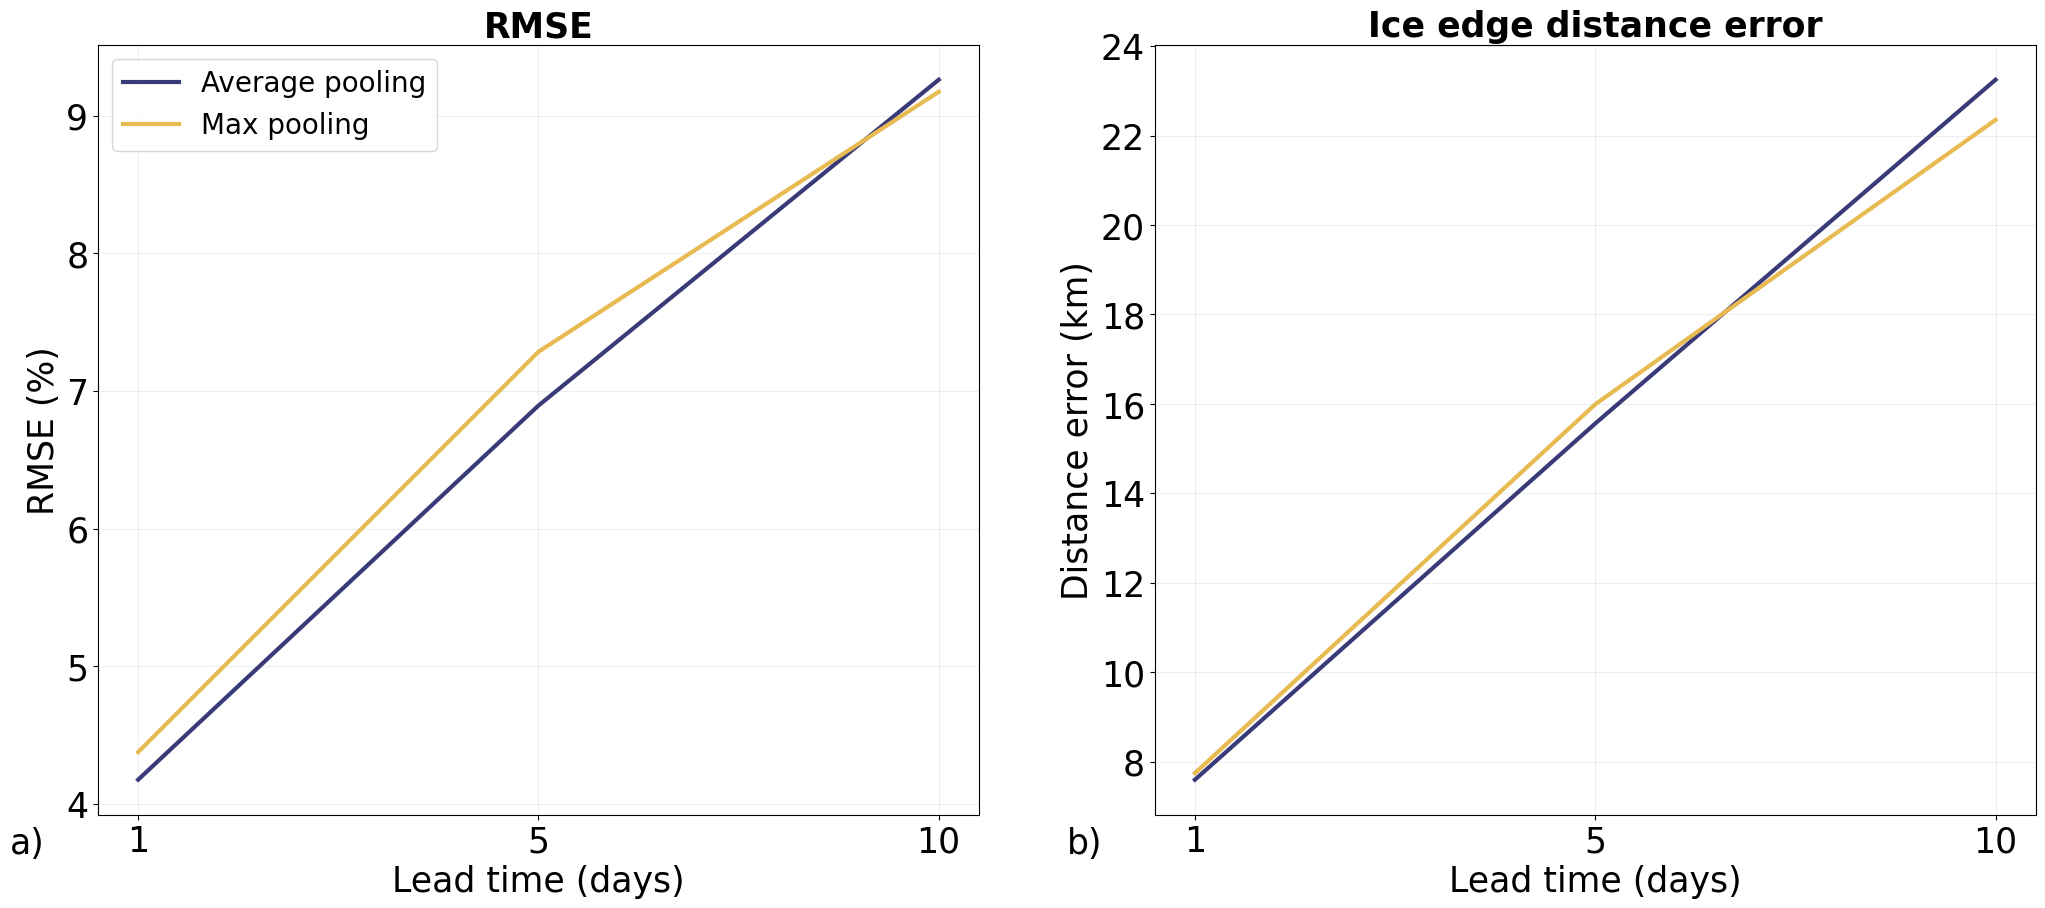

In [10]:
Scores = read_dataset(experiment_names, period, lead_times)
make_figure_absolute(Scores, experiment_names, lead_times, sizefont, sizefont_legend, saving = True)